# Spotify Music Classification with Unsupervised Learning
In this project, I will be using [this](https://www.kaggle.com/geomack/spotifyclassification) dataset from Keggle to generate a classifier to determine if the user will like a song. 

In [ ]:
# import data science/plotting libraries
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
songs = pd.read_csv("spotify-data.csv")
songs.drop(['Unnamed: 0'], axis=1, inplace=True)
songs.info()
songs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
 14  song_title        2017 non-null   object 
 15  artist            2017 non-null   object 
dtypes: float64(10), int64(4), object(2)
memory

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [ ]:
stats=songs.describe().drop(['count'])
stats

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [ ]:
stats.max(axis=1), stats.idxmax(axis=1)

(mean    2.463062e+05
 std     8.198181e+04
 min     1.604200e+04
 25%     2.000150e+05
 50%     2.292610e+05
 75%     2.703330e+05
 max     1.004627e+06
 dtype: float64, mean    duration_ms
 std     duration_ms
 min     duration_ms
 25%     duration_ms
 50%     duration_ms
 75%     duration_ms
 max     duration_ms
 dtype: object)

In [ ]:
stats.min(axis=1), stats.idxmin(axis=1)

(mean    -7.085624
 std      0.089931
 min    -33.097000
 25%     -8.394000
 50%     -6.248000
 75%     -4.746000
 max     -0.307000
 dtype: float64, mean       loudness
 std     speechiness
 min        loudness
 25%        loudness
 50%        loudness
 75%        loudness
 max        loudness
 dtype: object)

The standard divnetation and average are dominated in the the "duration_ms" field because it is noisy due to its scale. Loudness is also dominat because it has negative values.  

Now, Lets plot some data to see if some fields correlate

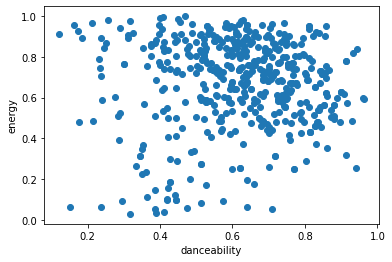

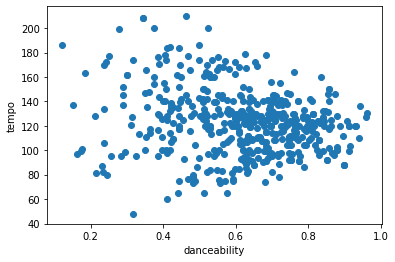

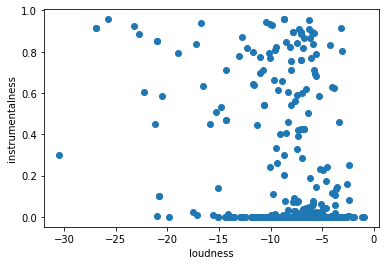

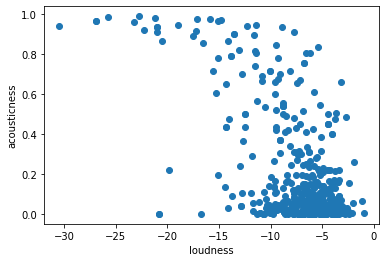

In [ ]:
# With 2017 entries, these scatter plots would look like a large blob if we use all the data at once
# Instead, we'll randomly sample 500 points and just plot those

np.random.seed(81)
sample_indices = np.random.randint(low=1, high=2017, size=500)

# Data subsets
danceability = songs['danceability'][sample_indices]
energy = songs['energy'][sample_indices]
loudness = songs['loudness'][sample_indices]
tempo = songs['tempo'][sample_indices]
acousticness = songs['acousticness'][sample_indices]
instrumentalness = songs['instrumentalness'][sample_indices]

# Danceability v. Energy
plt.figure(1)
plt.xlabel('danceability'), plt.ylabel('energy')
plt.scatter(danceability,energy)

# Danceability v. Tempo
plt.figure(2)
plt.xlabel('danceability'), plt.ylabel('tempo')
plt.scatter(danceability,tempo)

# Loudness v. Instrumentalness 
plt.figure(3)
plt.xlabel('loudness'), plt.ylabel('instrumentalness')
plt.scatter(loudness, instrumentalness)

# Loudness v. Acousticness
plt.figure(4)
plt.xlabel('loudness'), plt.ylabel('acousticness')
plt.scatter(loudness, acousticness)

Now, it is clear that danceable songs generally tend to be high-energy and cluster around 120bpm. Also, it is evident that louder songs may or may not use many instruments, but they are most often not very acoustic.

Now we can centralze our analysis by running some PCA. 

# Principal Component Analysis

In [ ]:
pca = PCA(n_components=2)
result = pca.fit_transform(songs.drop(['song_title','artist'],axis=1)) # Drop the non-numerical columns 
result_df = pd.DataFrame(data=result, columns=['pc1','pc2'])
result_df.insert(0,'artist', songs['artist']) # Add artist and song labels back in
result_df.insert(0,'song_title', songs['song_title'])
result_df.info()
result_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   song_title  2017 non-null   object 
 1   artist      2017 non-null   object 
 2   pc1         2017 non-null   float64
 3   pc2         2017 non-null   float64
dtypes: float64(2), object(2)
memory usage: 63.2+ KB


,song_title,artist,pc1,pc2
0,Mask Off,Future,-41706.197997,27.351406
1,Redbone,Childish Gambino,80626.801725,40.406036
2,Xanny Family,Future,-60599.196143,-48.093209
3,Master Of None,Beach House,-46893.196327,-36.468260
4,Parallel Lines,Junior Boys,146586.801374,55.982178


Since we broke down the data set, lets sample 45 elements and scatter them. The data will cluster into similar groups of the artists have similar msuic styles. 

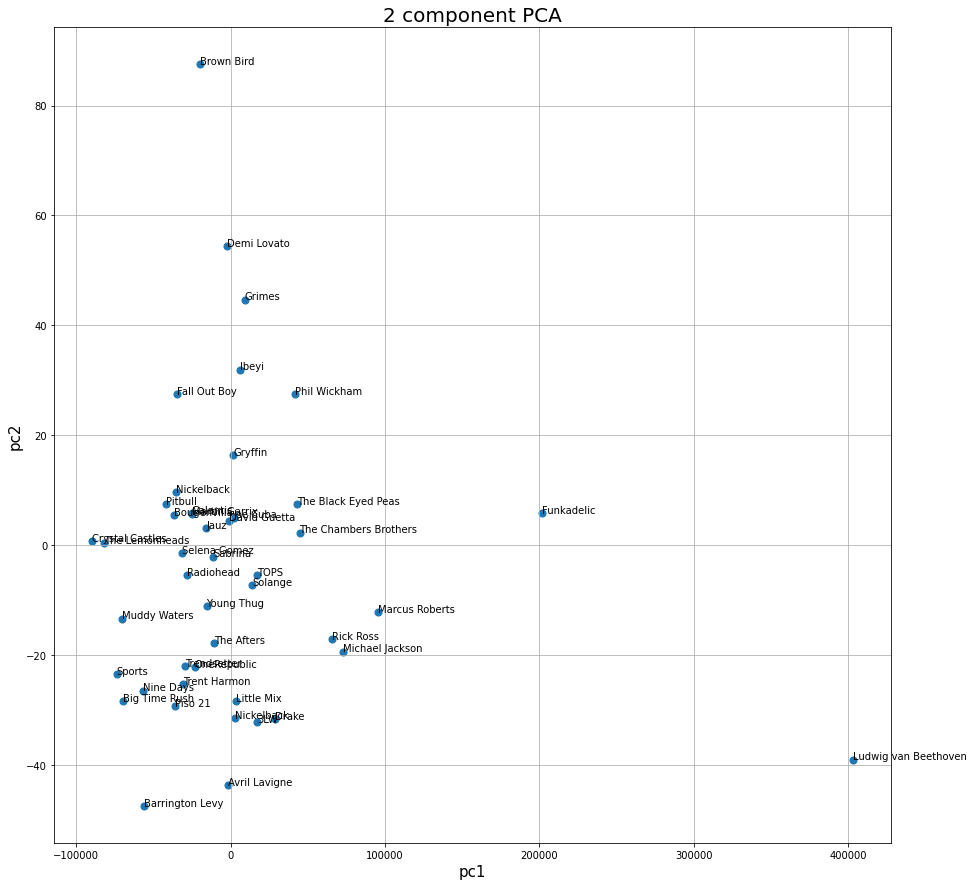

In [ ]:
N_ELEMENTS = 45

np.random.seed(61)
inds = np.random.randint(low=1, high=2017, size=N_ELEMENTS)
pc1_sample = result_df['pc1'][inds]
pc2_sample = result_df['pc2'][inds]

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('pc1', fontsize=15)
ax.set_ylabel('pc2', fontsize=15)
ax.set_title('2 component PCA', fontsize=20)
ax.scatter(pc1_sample, pc2_sample, s=50)
ax.grid()

artist_sample = result_df['artist'][inds]

for i, label in artist_sample.items():
    ax.annotate(label, (pc1_sample[i], pc2_sample[i]))

This is pretty reasonable! We see groups of pop artists like Selena Gomez and David Guetta, alternative artists like Fall Out Boy and Grimes, and Ludwig van Beethoven sitting in his own league far away.

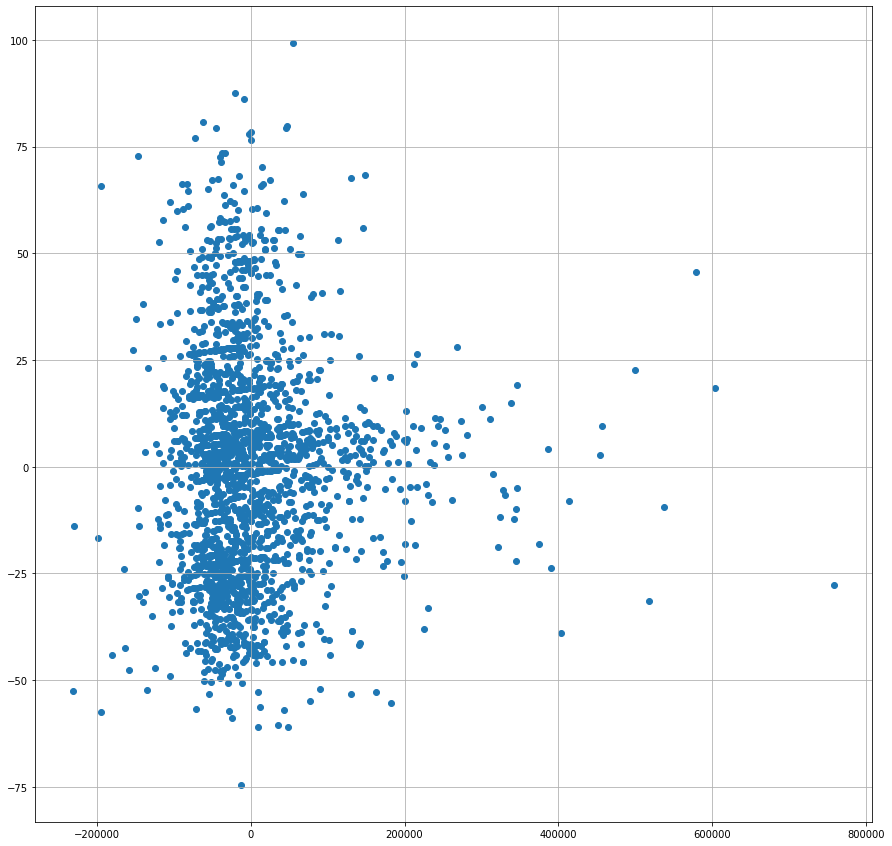

In [ ]:
pc1 = result_df['pc1']
pc2 = result_df['pc2']

plt.figure(figsize = (15,15))
plt.scatter(pc1,pc2)
plt.grid()

Above is the plot over the entire dataset. I was hoping we'd see more separation between values to the point that we could identify clusters as different genres, but I'm not too surprised with this result either. The majority of popular artists seem to vary along the second principal axis, while outliers on the first principal axis likely come from different time periods or geographies altogether (e.g. Beethoven).
We can observe these attributes on our PCA object itself. Let's see the amount of variance explained by each of the selected components.


In [ ]:
print("Explained variance:", pca.explained_variance_)
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance: [6.72101787e+09 7.08252413e+02]
Explained variance ratio: [9.99999891e-01 1.05378731e-07]


As suspected, 90% of variance occurs along the first axis. Let's see the singular values we'd get if we did this analysis manually by mean-centered SVD.


In [ ]:
print("Singular values:", pca.singular_values_)

Singular values: [3.68097433e+06 1.19492128e+03]
